In [8]:
from IPython.display import clear_output # clear_output() 으로 아웃풋 제거 가능
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import requests
import os
import re
from PIL import Image as pil

%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [2]:
df_info = pd.read_csv("N_Webtoon_1_toonsinfo.csv")

In [3]:
#len(df_info) # 1496

In [4]:
df_chapter = pd.read_csv("N_Webtoon_2_thumbnail.csv")

# 웹툰별 대표이미지 처리 및 저장

In [6]:
#웹툰별 대표이미지 처리 및 저장
for i in range(1496):
    clear_output()
    print('get',i,'th img...',end="")
    response = requests.get(df_info["img_url"][i],stream=True).raw
    pil_im = pil.open(response)
    pil_im
    temp_pil = pil_im
    if temp_pil.size[0] < 212 and temp_pil.size[1] < 190:
        temp_pil.resize((200,150), pil.ANTIALIAS).save('thumb_img_wbt/'+str(df_info["id"][i])+'.png') # ANTIALIAS: 이미지 resize시 깨지지 않게 저장
    else:    
        temp_pil.thumbnail((200,200)) # thumbnail: 세로와 가로의 사이즈를 동일한 비율로 수정
        area=(0,10,200,160) # left, top, right, bottom
        temp_pil.crop(area).save('thumb_img_wbt/'+str(df_info["id"][i])+'.png')
print("Done!")

# 웹툰 회차별 썸네일이미지 처리 및 저장

get 1495 th img...
웹툰 id :  67340 , 대표이미지


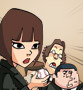

https://shared-comic.pstatic.net/thumb/webtoon/67340/33/inst_thumbnail_20090901193644.jpg
https://shared-comic.pstatic.net/thumb/webtoon/67340/32/inst_thumbnail_20090828220351.jpg
https://shared-comic.pstatic.net/thumb/webtoon/67340/31/inst_thumbnail_20090825115231.jpg
https://shared-comic.pstatic.net/thumb/webtoon/67340/30/inst_thumbnail_20090821181256.jpg
https://shared-comic.pstatic.net/thumb/webtoon/67340/29/inst_thumbnail_20090818174352.jpg
https://shared-comic.pstatic.net/thumb/webtoon/67340/28/inst_thumbnail_20090814180329.jpg
https://shared-comic.pstatic.net/thumb/webtoon/67340/27/inst_thumbnail_20090811182434.jpg
https://shared-comic.pstatic.net/thumb/webtoon/67340/26/inst_thumbnail_20090807180845.jpg
https://shared-comic.pstatic.net/thumb/webtoon/67340/25/inst_thumbnail_20090804174751.jpg
https://shared-comic.pstatic.net/thumb/webtoon/67340/24/inst_thumbnail_20090731154406.jpg
https://shared-comic.pstatic.net/thumb/webtoon/67340/23/inst_thumbnail_20090728174048.jpg
https://sh

In [11]:
#웹툰별 회차 썸네일이미지 처리 및 저장
for i in range(0, 1496):#4~1496
    clear_output()
    print('get',i,'th img...')
    response = requests.get(df_info["img_url"][i],stream=True).raw
    pil_im = pil.open(response)
    print('웹툰 id : ',df_info["id"][i],', 대표이미지')
    pil_im
    if not os.path.isdir('thumb_img_chap/'+str(df_info["id"][i])+'/'):
        os.mkdir('thumb_img_chap/'+str(df_info["id"][i])+'/')
    for j,row in df_chapter[df_chapter['id']==df_info["id"][i]].iterrows():
        print("이미지 정제중 : ",j,end="\r")
        if row['episode_title'] == 'AD 배너':
            continue
        img = row["img_url"]
        response = requests.get(img,stream=True).raw
        print(img)
        pil_im = pil.open(response)

        temp_pil = pil_im
        chapter = re.sub('[^A-Za-z0-9가-힣]', '', row['episode_title'])
        if temp_pil.size[0] < 250:
            temp_pil.resize((200,150), pil.ANTIALIAS).save('thumb_img_chap/'+str(df_info["id"][i])+'/'+str(df_info["id"][i])+'_'+chapter+'.png')
        else:    
            temp_pil.thumbnail((250,150))
            area=(25,0,225,150)#left, top, right, bottom
            temp_pil.crop(area).save('thumb_img_chap/'+str(df_info["id"][i])+'/'+str(df_info["id"][i])+'_'+chapter+'.png')
print("Done!")